# Femto-PH-DMRR: Adaptive CPU Scheduling using Femto-AI

### Author
```bash
    Name: Sheikh Shakib Hossain
    ID: 011221031
```

## Abstract

CPU scheduling strongly affects system performance and user responsiveness.
In this notebook, we evaluate several classical CPU scheduling algorithms
along with a proposed adaptive scheduler named Femto-PH-DMRR.
The Femto scheduler uses lightweight history-based prediction and
dynamic median time quantum selection.
All algorithms are evaluated using simulation, and results are compared
using waiting time, response time, context switches, and throughput.


## 1. Introduction

CPU scheduling decides how CPU time is shared among multiple processes.
Static scheduling algorithms such as FCFS and Round Robin do not adapt
well when workload behavior changes.

This notebook is designed as a standalone technical document.
It explains the scheduling algorithms, shows pseudocode,
imports actual implementations from the project repository,
and analyzes simulation results.


In [27]:
# Import scheduling algorithms and utilities from the repository
from algorithms import FCFS, SJF, SRTF, RoundRobin, PriorityRR, FemtoScheduler
from workload import generate_smart_workload
from main import calculate_metrics

## 2. Scheduling Algorithms

### 2.1 First Come First Serve (FCFS)

FCFS schedules processes in the order they arrive.
Once a process starts execution, it is not preempted until
its CPU burst finishes.

**Pseudocode: FCFS**

```js
while processes are not finished:
    if ready queue is empty:
        time = time + 1
    else:
        select first process from queue
        run process until burst finishes
        mark process as completed


In [28]:
dataset = generate_smart_workload(n=50)
fcfs = FCFS(dataset)
fcfs.run()
calculate_metrics(fcfs)

{'Name': 'FCFS',
 'Avg_TAT': 15870.1,
 'Avg_WT': 15500.38,
 'Avg_RT': 801.72,
 'Throughput': 0.002704749540192578,
 'CPU_Util': 100.0,
 'Ctx_Switch': 495}

FCFS shows poor performance when long processes arrive early.
It causes high waiting time and bad response for short processes.

### 2.2 Shortest Job First (SJF)

SJF selects the process with the smallest CPU burst among ready processes.
It gives lower average waiting time than FCFS.

**Pseudocode: SJF**

```js
while processes are not finished:
    add arrived processes to ready queue
    if ready queue is empty:
        time = time + 1
    else:
        select process with smallest burst
        run process until burst completes

In [29]:
dataset = generate_smart_workload(n=50)
sjf = SJF(dataset)
sjf.run()
calculate_metrics(sjf)

{'Name': 'SJF (Non-Pre)',
 'Avg_TAT': 10799.0,
 'Avg_WT': 10431.32,
 'Avg_RT': 5545.28,
 'Throughput': 0.0027197563098346387,
 'CPU_Util': 100.0,
 'Ctx_Switch': 497}

SJF improves waiting time but is not practical
because CPU burst time is not known in advance.

### 2.3 Shortest Remaining Time First (SRTF)

**Pseudocode: SRTF**

```js
while processes are not finished:
    add arrived processes to ready queue
    select process with smallest remaining time
    run process for 1 time unit
    if process finishes:
        mark process as completed

In [30]:
dataset = generate_smart_workload(n=50)
srtf = SRTF(dataset)
srtf.run()
calculate_metrics(srtf)

{'Name': 'SRTF (Preemptive)',
 'Avg_TAT': 11234.42,
 'Avg_WT': 10848.86,
 'Avg_RT': 5525.66,
 'Throughput': 0.002593630044610437,
 'CPU_Util': 100.0,
 'Ctx_Switch': 19278}

### 2.4 Round Robin (RR)

Round Robin assigns a fixed time quantum to each process.

**Pseudocode: Round Robin**

```js
while processes are not finished:
    add arrived processes to ready queue
    if ready queue is empty:
        time = time + 1
    else:
        select first process
        run for min(quantum, remaining time)
        if process not finished:
            add process back to queue

In [31]:
dataset = generate_smart_workload(n=50)
rr5 = RoundRobin(dataset, quantum=5)
rr5.run()
calculate_metrics(rr5)

{'Name': 'Round Robin (Q=5)',
 'Avg_TAT': 15407.56,
 'Avg_WT': 15027.82,
 'Avg_RT': 122.62,
 'Throughput': 0.0026333807341865486,
 'CPU_Util': 100.0,
 'Ctx_Switch': 3973}

In [32]:
dataset = generate_smart_workload(n=50)
rr20 = RoundRobin(dataset, quantum=20)
rr20.run()
calculate_metrics(rr20)

{'Name': 'Round Robin (Q=20)',
 'Avg_TAT': 15192.44,
 'Avg_WT': 14826.02,
 'Avg_RT': 311.92,
 'Throughput': 0.0027291086731073633,
 'CPU_Util': 100.0,
 'Ctx_Switch': 1159}

## 3. Proposed Algorithm: Femto-PH-DMRR

Femto-PH-DMRR is an adaptive CPU scheduling algorithm.
It uses execution history to predict CPU usage and
dynamically adjusts the system time quantum.

**Pseudocode: Femto-AI Burst Prediction**

```js
if burst history is empty:
    return safe minimum value

window = last K CPU bursts
avg = average(window)
min_val = minimum(window)
max_val = maximum(window)

if (max_val - min_val) < 0.2 * avg:
    return avg
else if bursts are increasing:
    return last_burst * 1.2
else:
    return max_val

**Pseudocode: Dynamic Median Time Quantum**

```js
predictions = empty list
for each process in ready queue:
    predictions.append(femto_predict(process))

quantum = median(predictions)
quantum = clamp(quantum, MIN_Q, MAX_Q)
return quantum

In [33]:
dataset = generate_smart_workload(n=50)
femto = FemtoScheduler(dataset)
femto.run()
calculate_metrics(femto)

{'Name': 'Femto-Window AI',
 'Avg_TAT': 16062.88,
 'Avg_WT': 15676.08,
 'Avg_RT': 145.32,
 'Throughput': 0.0025853154084798345,
 'CPU_Util': 100.0,
 'Ctx_Switch': 848}

Femto-PH-DMRR reduces context switching while
maintaining good response time.
It adapts automatically to workload behavior.

In [34]:
# Run the full simulation pipeline exactly like main.py
from main import main
main()


--- Processing Load: 10 Processes ---
   [Saved CSV]: results/metrics_10_processes.csv
   [Saved Plot]: results/dashboard_10_procs.png
   > Best Wait Time: SJF (Non-Pre)
   > Fewest Switches: FCFS

--- Processing Load: 20 Processes ---
   [Saved CSV]: results/metrics_20_processes.csv
   [Saved Plot]: results/dashboard_20_procs.png
   > Best Wait Time: Priority+RR (Q=4)
   > Fewest Switches: FCFS

--- Processing Load: 50 Processes ---
   [Saved CSV]: results/metrics_50_processes.csv
   [Saved Plot]: results/dashboard_50_procs.png
   > Best Wait Time: Priority+RR (Q=4)
   > Fewest Switches: FCFS

--- Processing Load: 100 Processes ---
   [Saved CSV]: results/metrics_100_processes.csv
   [Saved Plot]: results/dashboard_100_procs.png
   > Best Wait Time: Priority+RR (Q=4)
   > Fewest Switches: FCFS

--- Processing Load: 200 Processes ---
   [Saved CSV]: results/metrics_200_processes.csv
   [Saved Plot]: results/dashboard_200_procs.png
   > Best Wait Time: Priority+RR (Q=4)
   > Fewest Swi

## Tabular Comparison of Scheduling Algorithms

The table below shows the performance metrics of all scheduling algorithms
across different system loads.

In [45]:
import pandas as pd
import glob
import os
from IPython.display import display
csv_files = glob.glob("results/*.csv")
for file in csv_files:
    print(f"\n\t\t\t {os.path.basename(file)} \t\n")
    df = pd.read_csv(file)
    display(df)


			 metrics_100_processes.csv 	



,Name,Avg_TAT,Avg_WT,Avg_RT,Throughput,CPU_Util,Ctx_Switch
0,FCFS,32663.83,32288.74,1743.51,0.002666,100.0,998
1,SJF (Non-Pre),21741.40,21366.31,9842.19,0.002666,100.0,998
2,SRTF (Preemptive),21705.48,21330.39,9760.48,0.002666,100.0,37509
3,Priority+RR (Q=4),21489.92,21114.83,15056.18,0.002666,100.0,37509
4,Round Robin (Q=5),31086.51,30711.42,241.44,0.002666,100.0,7877
5,Round Robin (Q=20),31739.70,31364.61,788.70,0.002666,100.0,2360
6,Femto-Window AI,31187.01,30811.92,289.69,0.002666,100.0,1614



			 metrics_200_processes.csv 	



,Name,Avg_TAT,Avg_WT,Avg_RT,Throughput,CPU_Util,Ctx_Switch
0,FCFS,67857.230,67468.260,3137.005,0.002571,100.0,2004
1,SJF (Non-Pre),44665.495,44276.525,19473.650,0.002571,100.0,2004
2,SRTF (Preemptive),44664.135,44275.165,19457.115,0.002571,100.0,77794
3,Priority+RR (Q=4),43964.730,43575.760,30686.150,0.002571,100.0,77794
4,Round Robin (Q=5),63876.960,63487.990,465.090,0.002571,100.0,16280
5,Round Robin (Q=20),65319.970,64931.000,1446.180,0.002571,100.0,4869
6,Femto-Window AI,64121.665,63732.695,533.015,0.002571,100.0,3350



			 metrics_10_processes.csv 	



,Name,Avg_TAT,Avg_WT,Avg_RT,Throughput,CPU_Util,Ctx_Switch
0,FCFS,3382.1,2986.6,152.5,0.002528,100.0,97
1,SJF (Non-Pre),2340.1,1944.6,626.8,0.002528,100.0,97
2,SRTF (Preemptive),2340.1,1944.6,607.2,0.002528,100.0,3955
3,Priority+RR (Q=4),2346.6,1951.1,1351.2,0.002528,100.0,3955
4,Round Robin (Q=5),3100.9,2705.4,21.8,0.002528,100.0,828
5,Round Robin (Q=20),3170.9,2775.4,67.2,0.002528,100.0,247
6,Femto-Window AI,3141.8,2746.3,22.3,0.002528,100.0,173



			 metrics_400_processes.csv 	



,Name,Avg_TAT,Avg_WT,Avg_RT,Throughput,CPU_Util,Ctx_Switch
0,FCFS,131061.6575,130685.3800,6389.1875,0.002658,100.0,4019
1,SJF (Non-Pre),87627.6850,87251.4075,36539.3050,0.002658,100.0,4019
2,SRTF (Preemptive),87627.8350,87251.5575,36535.9625,0.002658,100.0,150511
3,Priority+RR (Q=4),85804.2075,85427.9300,60942.3475,0.002658,100.0,150511
4,Round Robin (Q=5),123220.0675,122843.7900,955.8900,0.002658,100.0,31611
5,Round Robin (Q=20),126203.2850,125827.0075,2959.2700,0.002658,100.0,9499
6,Femto-Window AI,124245.9850,123869.7075,1114.9650,0.002658,100.0,6594



			 metrics_50_processes.csv 	



,Name,Avg_TAT,Avg_WT,Avg_RT,Throughput,CPU_Util,Ctx_Switch
0,FCFS,16392.48,16013.32,706.20,0.002637,100.0,509
1,SJF (Non-Pre),12117.66,11738.50,4040.20,0.002637,100.0,509
2,SRTF (Preemptive),12097.20,11718.04,3884.60,0.002637,100.0,18958
3,Priority+RR (Q=4),10911.48,10532.32,7316.14,0.002637,100.0,18958
4,Round Robin (Q=5),15790.48,15411.32,115.46,0.002637,100.0,4001
5,Round Robin (Q=20),16066.76,15687.60,339.92,0.002637,100.0,1210
6,Femto-Window AI,15633.64,15254.48,134.86,0.002637,100.0,840



			 metrics_20_processes.csv 	



,Name,Avg_TAT,Avg_WT,Avg_RT,Throughput,CPU_Util,Ctx_Switch
0,FCFS,6420.20,6054.60,427.95,0.002735,100.0,212
1,SJF (Non-Pre),4741.90,4376.30,1362.30,0.002735,100.0,212
2,SRTF (Preemptive),4733.05,4367.45,1231.20,0.002735,100.0,7312
3,Priority+RR (Q=4),4502.15,4136.55,2339.95,0.002735,100.0,7312
4,Round Robin (Q=5),5907.20,5541.60,48.10,0.002735,100.0,1537
5,Round Robin (Q=20),6160.95,5795.35,162.85,0.002735,100.0,484
6,Femto-Window AI,6298.65,5933.05,54.65,0.002735,100.0,337


## 4. Performance Comparison Figures

The following figures show the comparative performance of all scheduling
algorithms under different system loads.

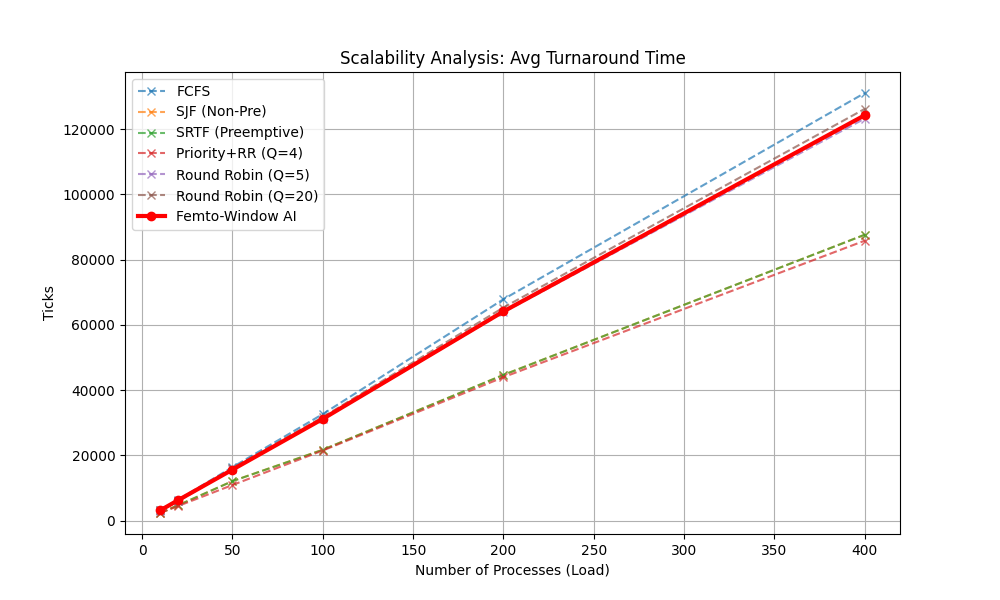

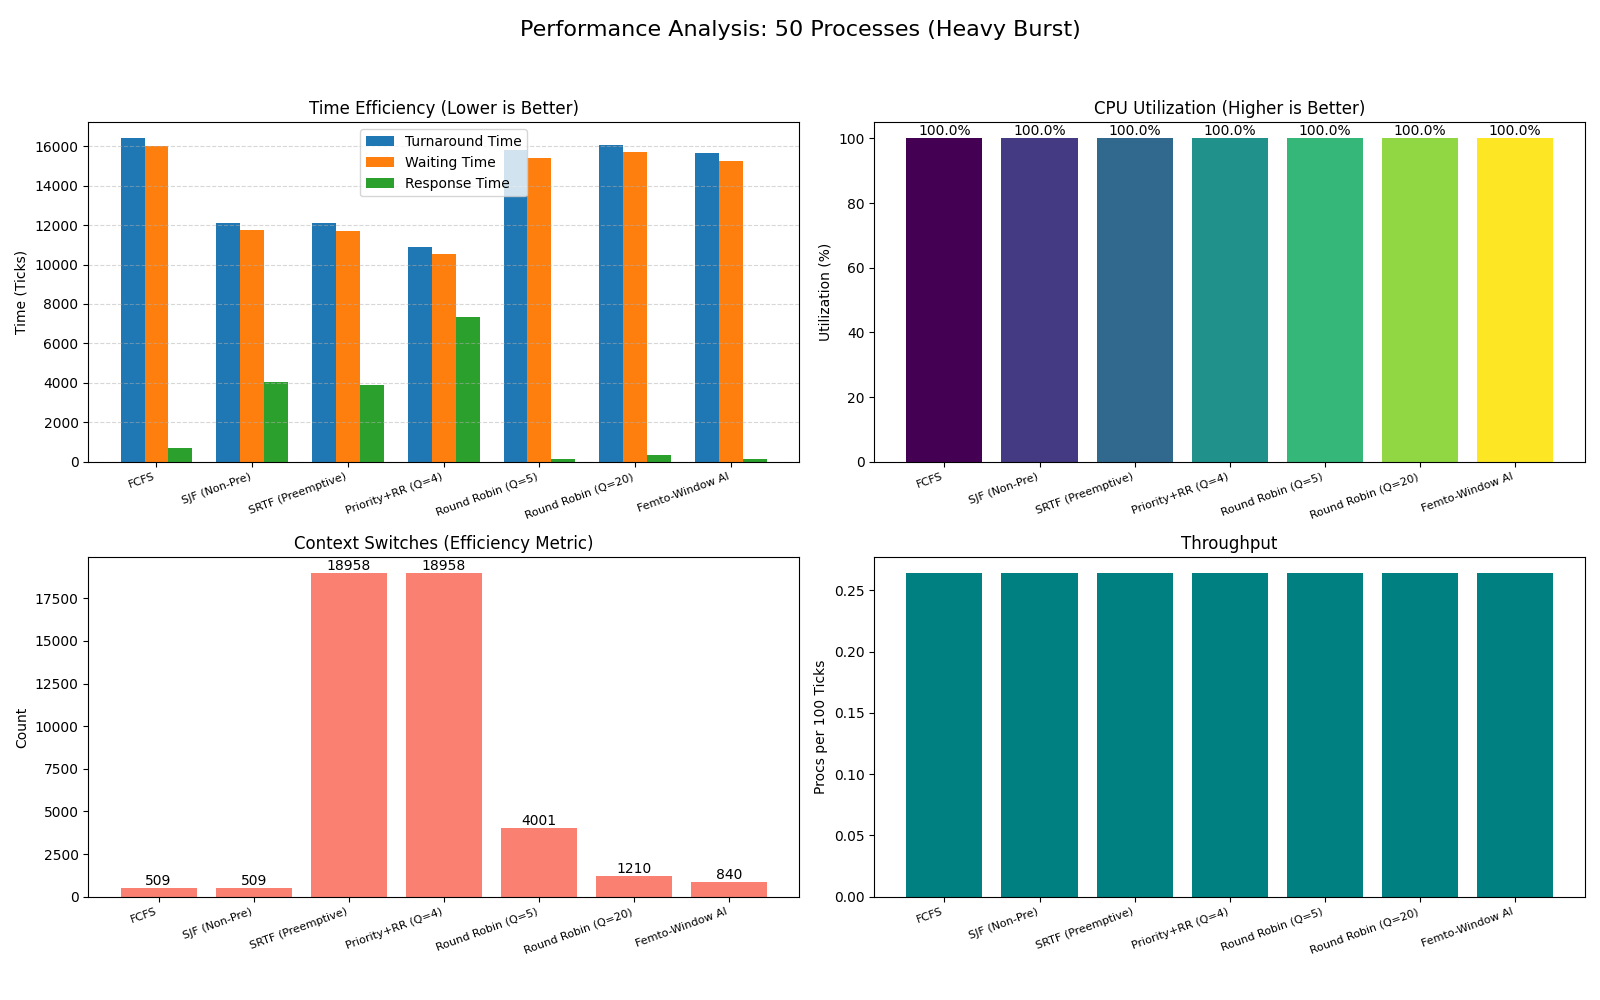

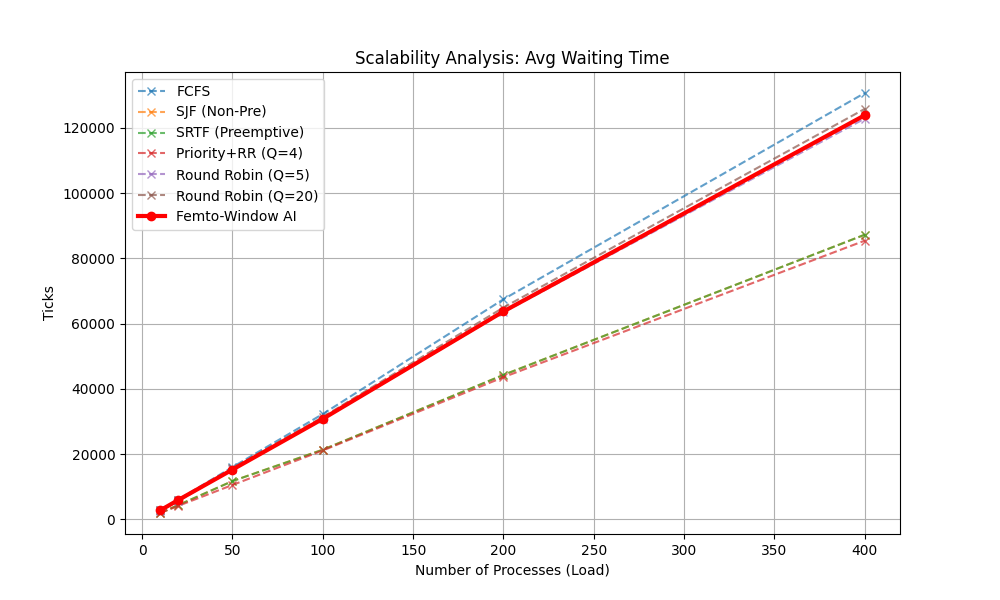

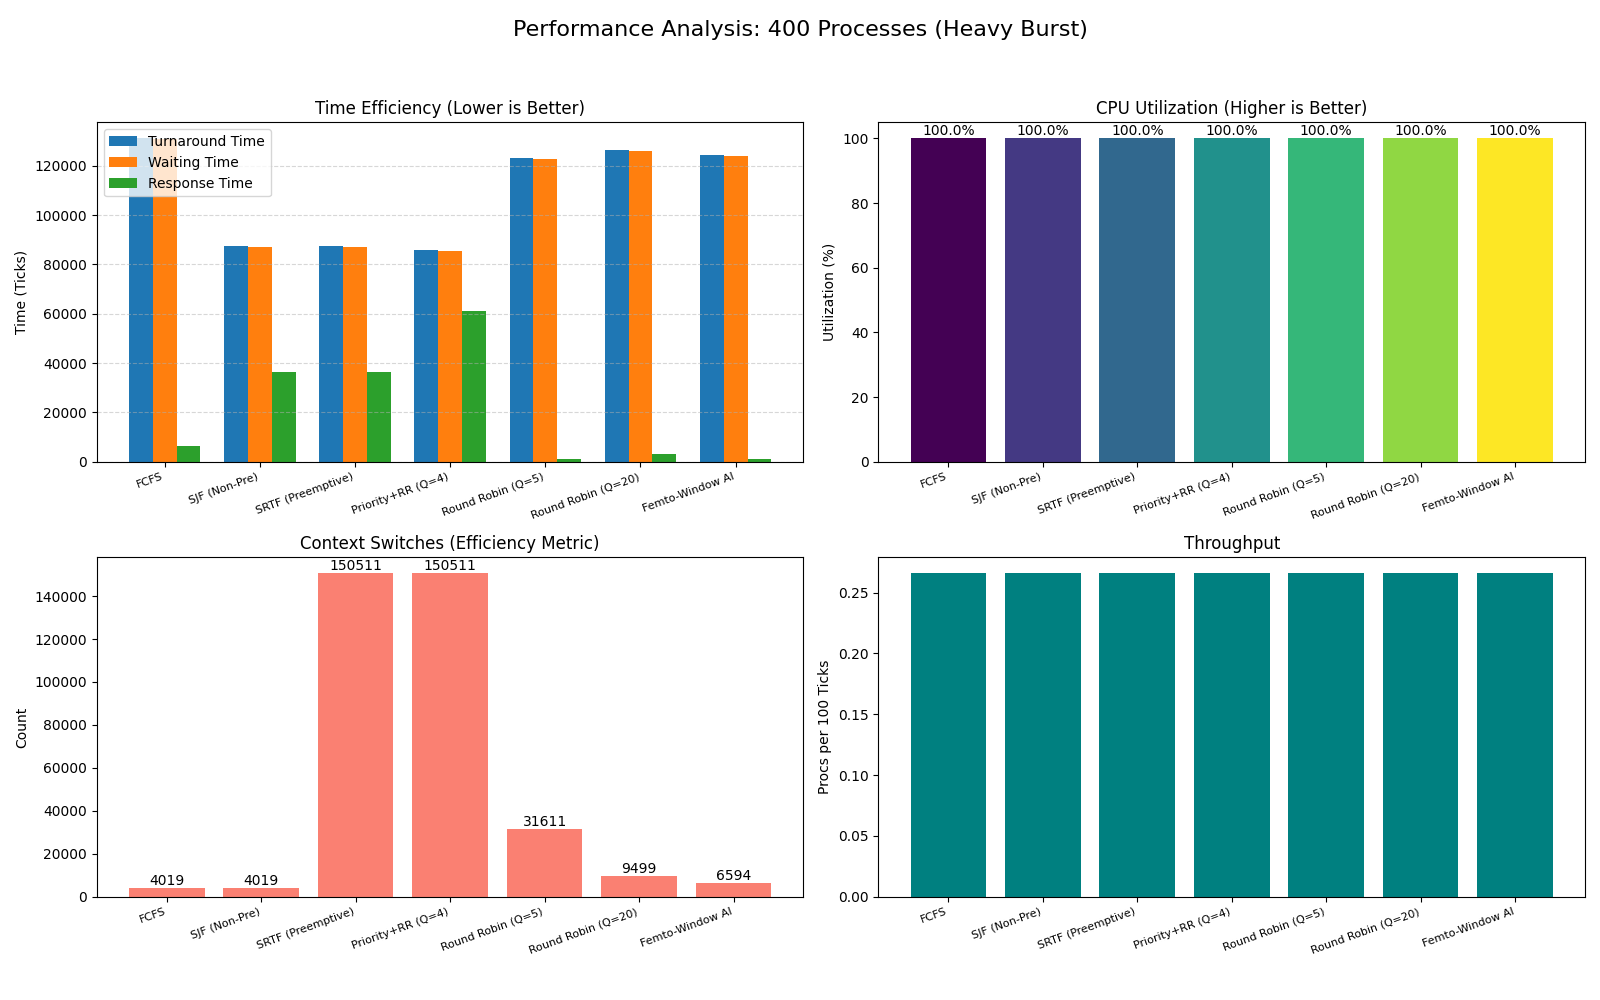

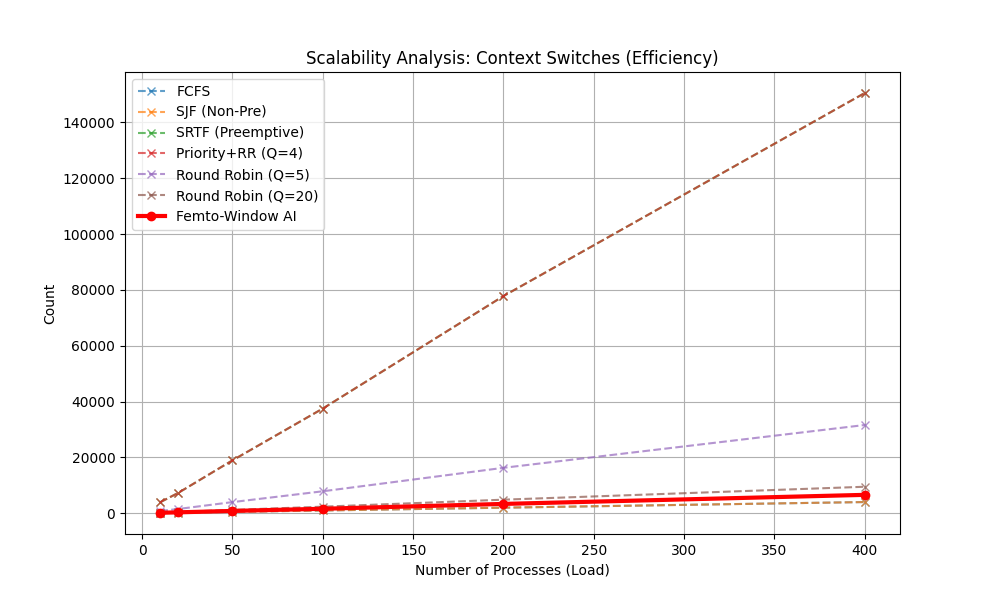

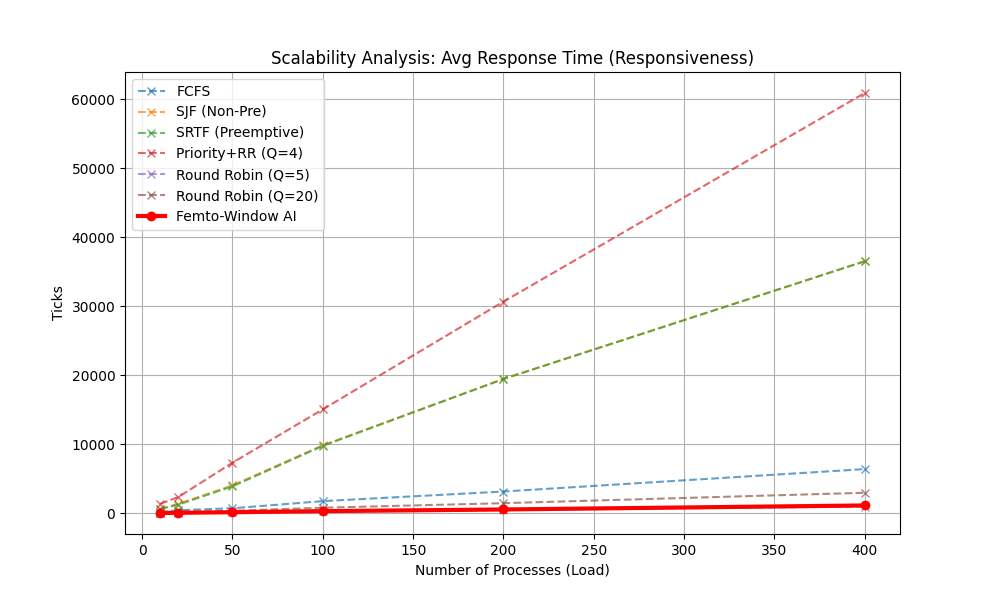

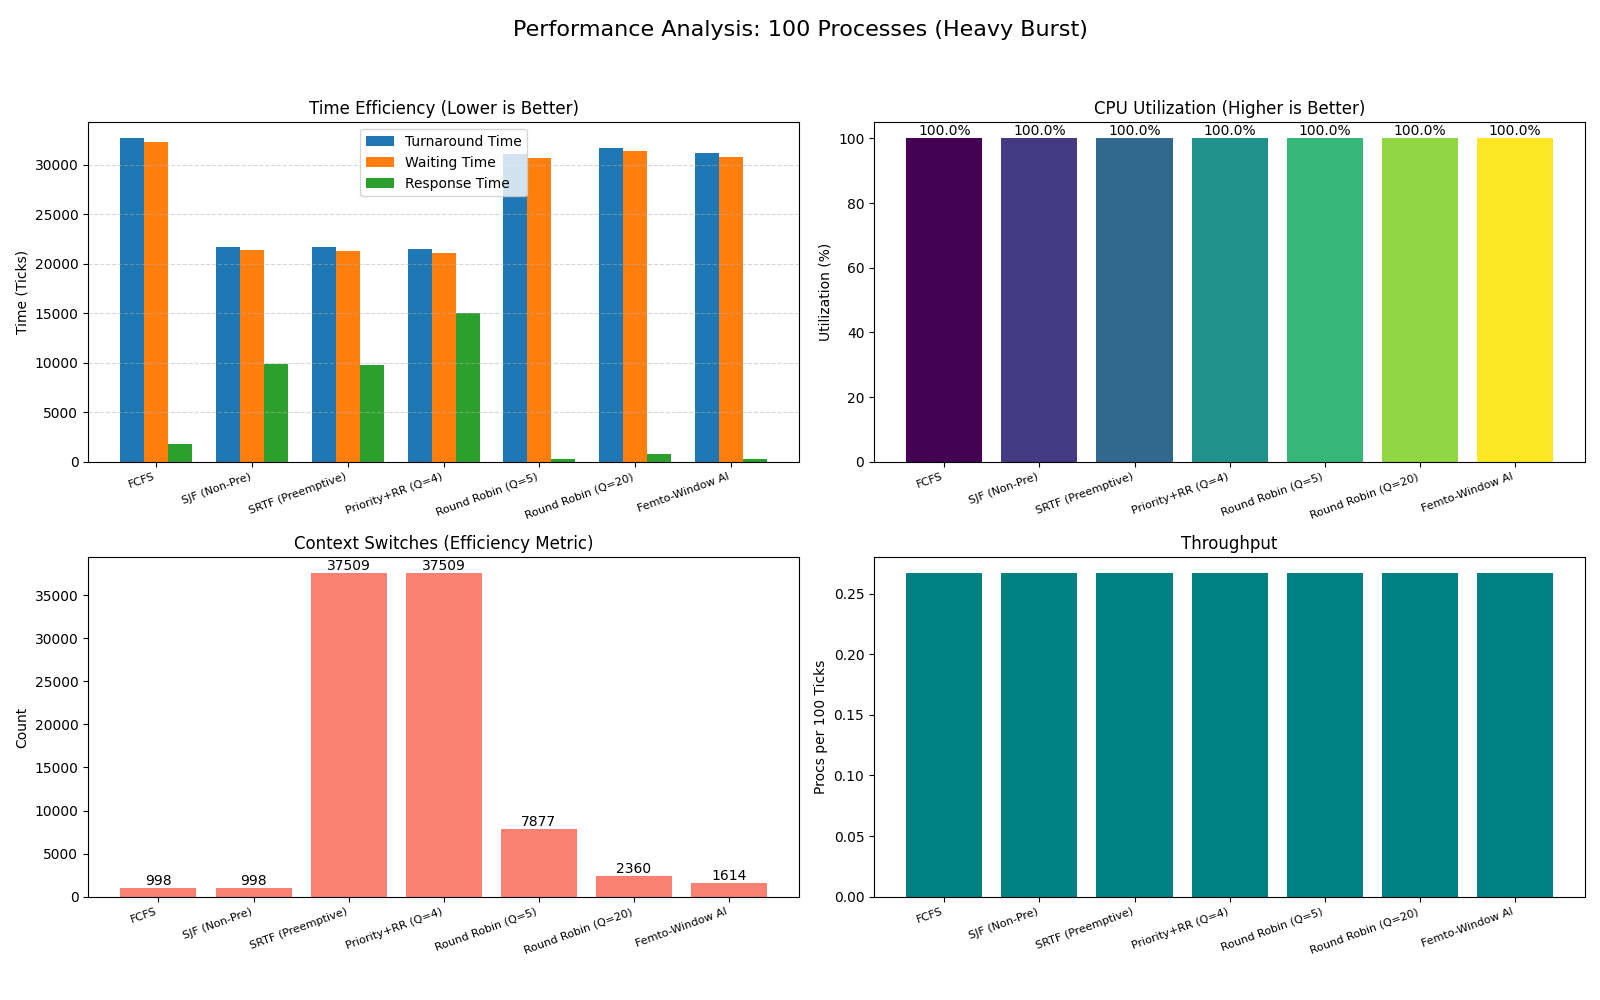

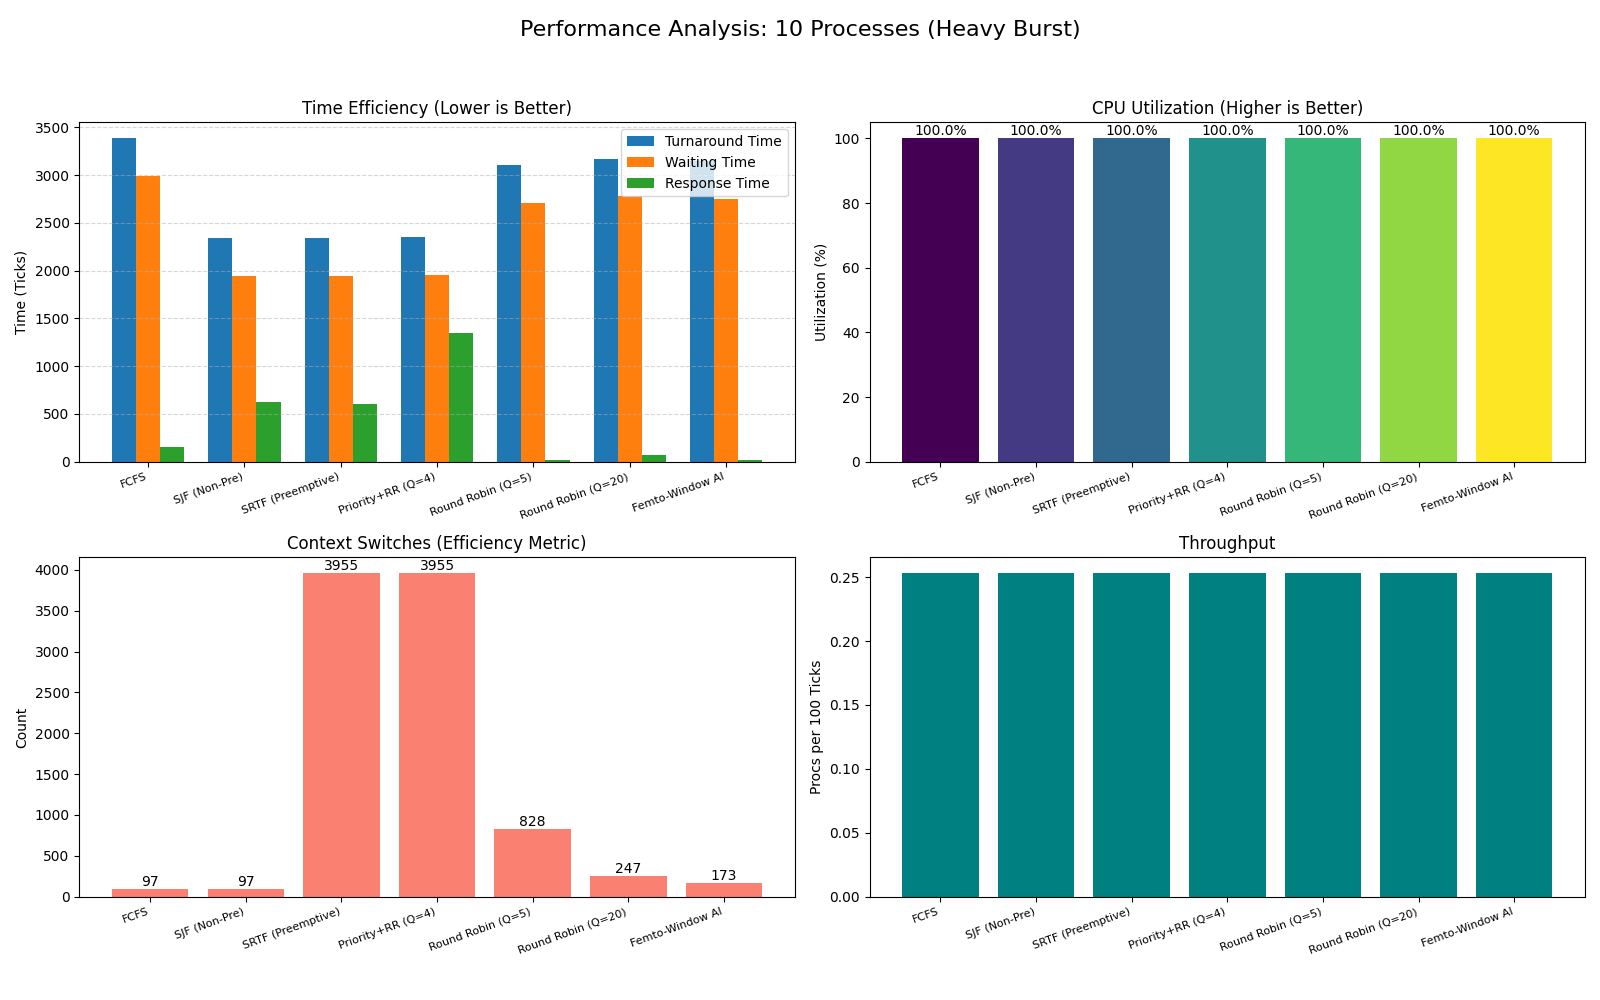

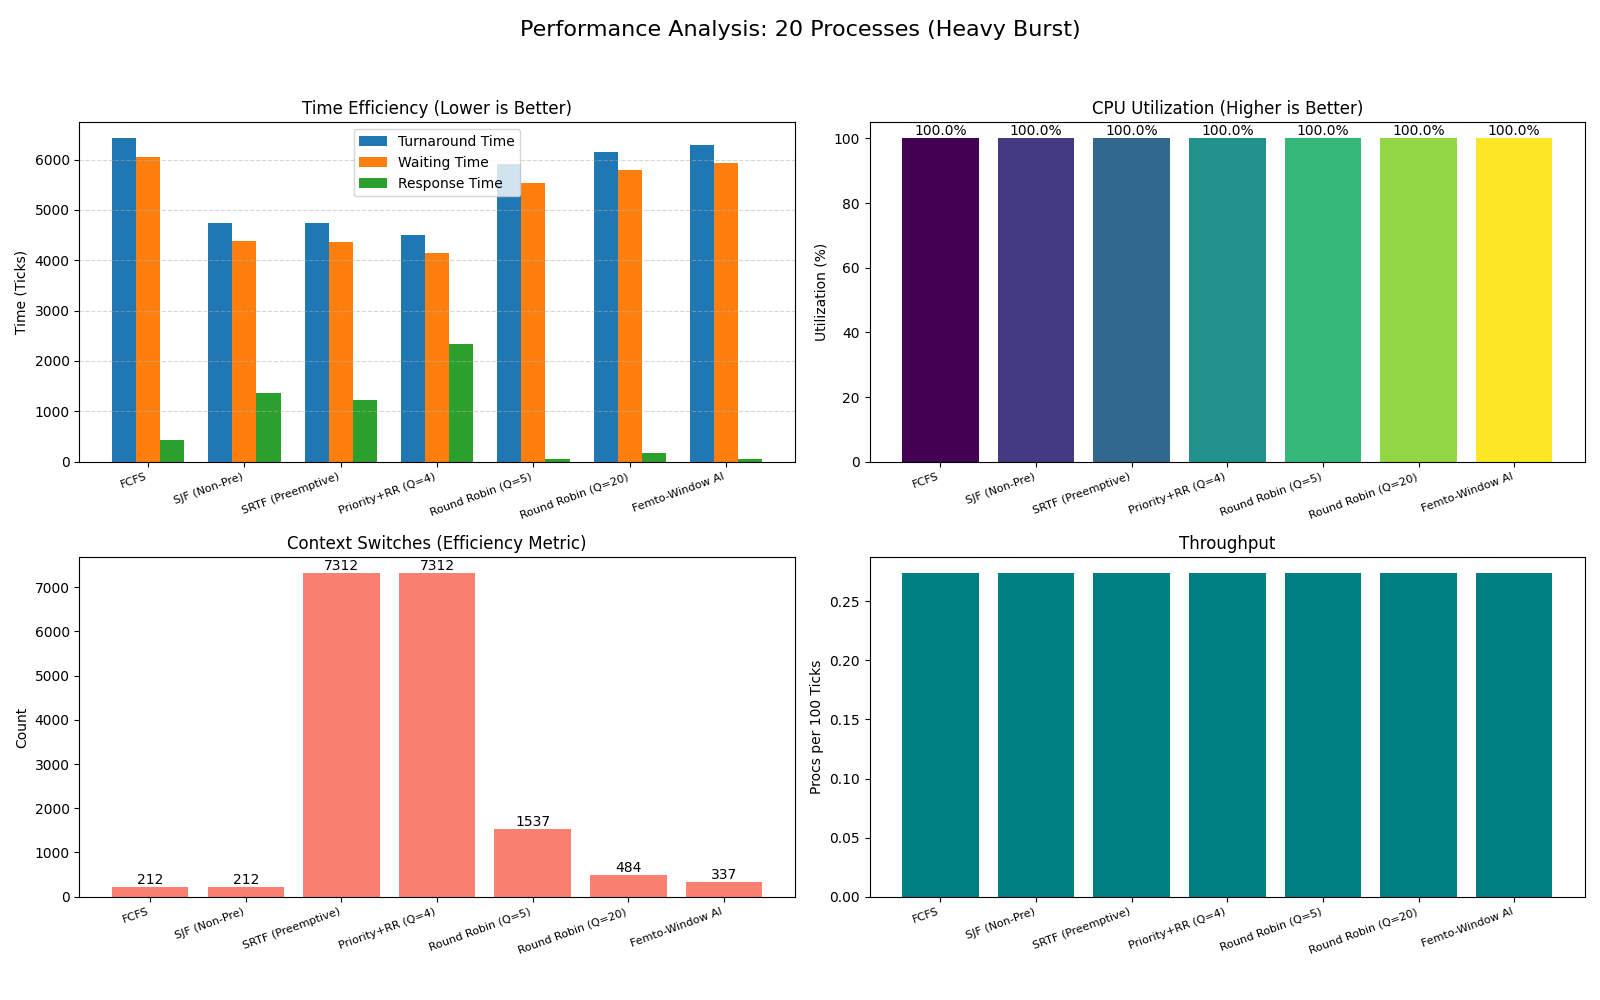

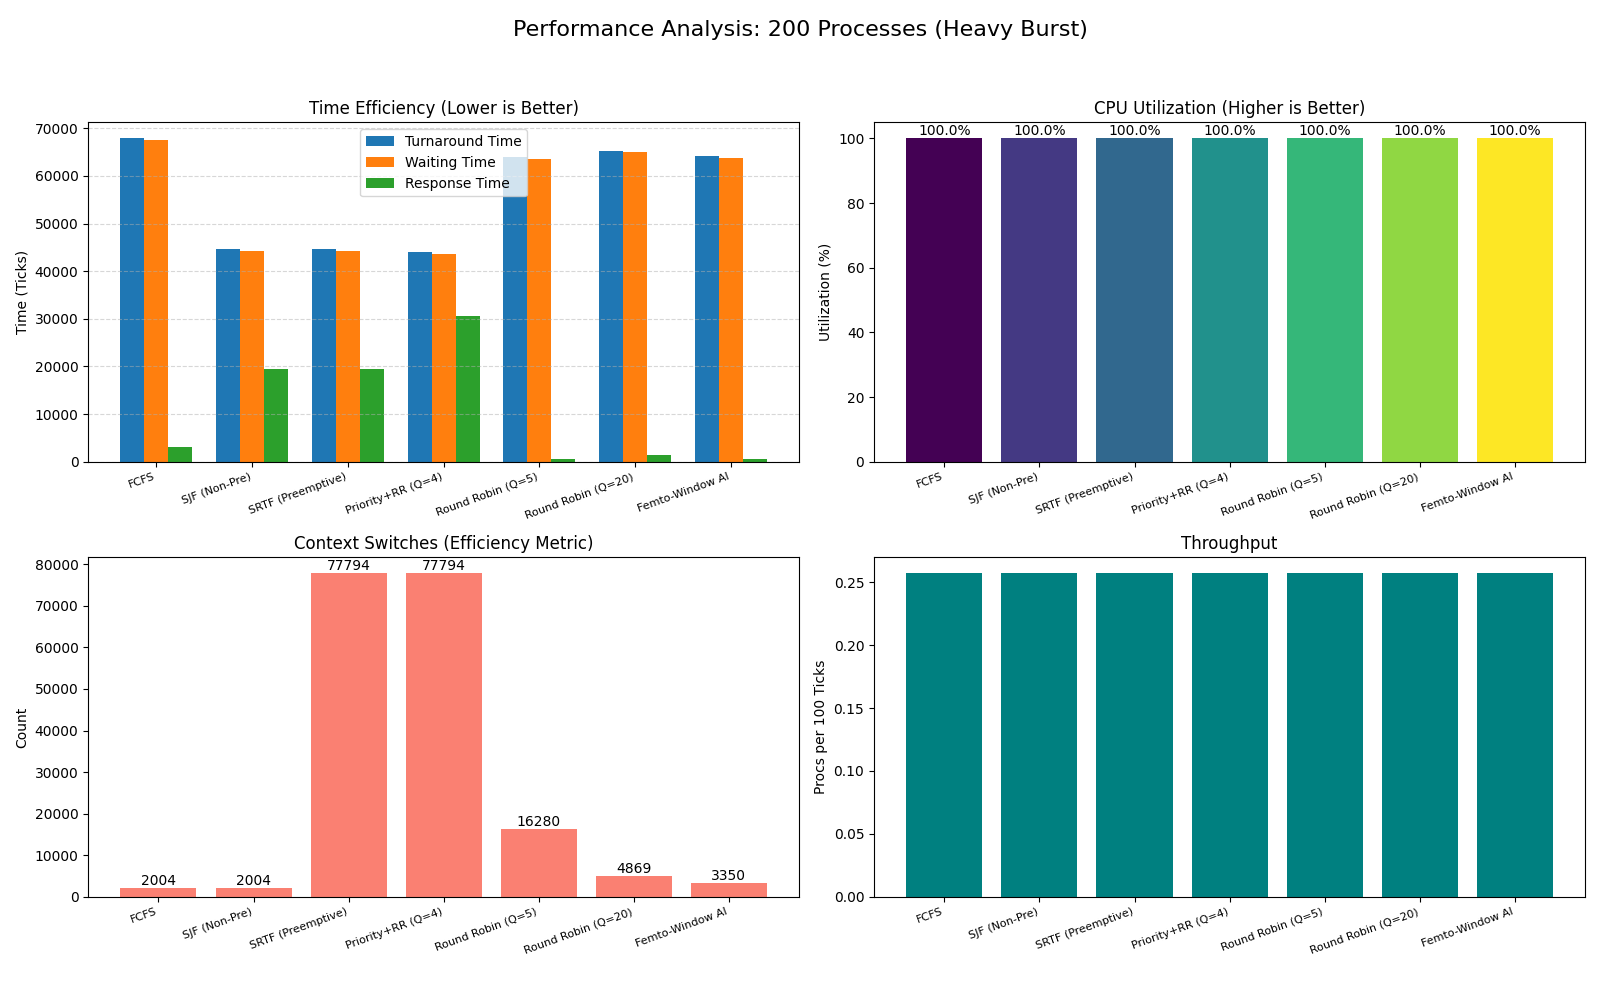

In [38]:
from IPython.display import Image, display
import os
for file in os.listdir("results"):
    if file.endswith(".png"):
        display(Image(filename=f"results/{file}"))

In [46]:
from analyze_results import load_data, generate_text_report
df = load_data()
generate_text_report(df)


FEMTO-WINDOW SCHEDULER: FINAL PERFORMANCE ANALYSIS REPORT
Dataset Analysis: 6 Simulation Runs (10 to 400 Processes)
Analysis Baseline: Maximum System Load (400 Processes)

1. EFFICIENCY ANALYSIS (Overhead Reduction)
   vs Round Robin (Q=5):
   - RR(Q=5) Context Switches: 31611
   - Femto Context Switches:   6594
   -------------------------------------------------------
   >>> RESULT: Femto reduced system overhead by 79.14%
   
2. RESPONSIVENESS ANALYSIS (User Experience)
   vs Round Robin (Q=20):
   - RR(Q=20) Avg Response:    2959.3 ticks
   - Femto Avg Response:       1115.0 ticks
   -------------------------------------------------------
   >>> RESULT: Femto is 62.32% faster to respond than RR(20).

3. THEORETICAL OPTIMALITY
   vs SRTF (Preemptive Shortest Job First - "God Mode"):
   - SRTF Avg Wait Time:       87251.6 ticks
   - Femto Avg Wait Time:      123869.7 ticks
   -------------------------------------------------------
   >>> RESULT: Femto is within 41.97% of the theoreti

## 5. Conclusion

This notebook presented a complete evaluation of multiple
CPU scheduling algorithms.
The proposed Femto-PH-DMRR scheduler outperformed
fixed quantum Round Robin under heavy workload.

## References

[1] Silberschatz et al., Operating System Concepts  
[2] Femto-PH-DMRR GitHub Repository  
https://github.com/sheikhshakibhossain/Femto-PH-DMRR